One way of minimizing the size of an image is to simply reduce the number of bits you use to represent each pixel. by default this number is 24 bits for RGB representation. You can reduce this number by quantization and reduce it to 1 bit (black or white).

However this has its downside which is known as banding effect.

Ordered dithering is a technique in which we try to minimize this effect by distributing errors. There are also some other techniques like floyd-steinberg algorithm which works better but is slower than ordered dithering.

Dithering is done...


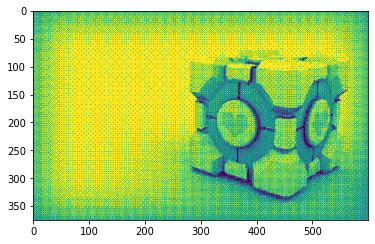

In [13]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def dither_matrix(n:int):
    if n == 1:
        return np.array([[0]])
    else:
        first = (n ** 2) * dither_matrix(int(n/2))
        second = (n ** 2) * dither_matrix(int(n/2)) + 2
        third = (n ** 2) * dither_matrix(int(n/2)) + 3
        fourth = (n ** 2) * dither_matrix(int(n/2)) + 1
        first_col = np.concatenate((first, third), axis=0)
        second_col = np.concatenate((second, fourth), axis=0)
        return (1/n**2) * np.concatenate((first_col, second_col), axis=1)

def get_image(src:str):
    img = np.array(Image.open(src))
    img_arr = [[(j[0] * 299/1000) + (j[1] * 587/1000) + (j[2] * 114/1000) for j in r] for r in img]
    img_gray = np.array(img_arr)
    Image.fromarray(img_gray).convert('L')
    plt.imshow(img_gray)
    return img_gray * (1/255)

def ordered_dithering(img_pixel:np.array, dither_m:np.array):
    n = np.size(dither_m, axis=0)
    x_max = np.size(img_pixel, axis=1)
    y_max = np.size(img_pixel, axis=0)
    for x in range(x_max):
        for y in range(y_max):
            i = x % n
            j = y % n
            if img_pixel[y][x] > dither_m[i][j]:
                img_pixel[y][x] = 255
            else:
                img_pixel[y][x] = 0

    Image.fromarray(img_pixel).convert('L')
    plt.imshow(img_pixel)

n = 128
src = "/content/cube.jpg"
dm = dither_matrix(n)
img = get_image(src)

ordered_dithering(img, dm)
print('Dithering is done...')

In [2]:
dm

array([[0.        , 0.22222222, 0.05555556, 0.27777778, 0.01388889,
        0.23611111, 0.06944444, 0.29166667, 0.00347222, 0.22569444,
        0.05902778, 0.28125   , 0.01736111, 0.23958333, 0.07291667,
        0.29513889],
       [0.33333333, 0.11111111, 0.38888889, 0.16666667, 0.34722222,
        0.125     , 0.40277778, 0.18055556, 0.33680556, 0.11458333,
        0.39236111, 0.17013889, 0.35069444, 0.12847222, 0.40625   ,
        0.18402778],
       [0.08333333, 0.30555556, 0.02777778, 0.25      , 0.09722222,
        0.31944444, 0.04166667, 0.26388889, 0.08680556, 0.30902778,
        0.03125   , 0.25347222, 0.10069444, 0.32291667, 0.04513889,
        0.26736111],
       [0.41666667, 0.19444444, 0.36111111, 0.13888889, 0.43055556,
        0.20833333, 0.375     , 0.15277778, 0.42013889, 0.19791667,
        0.36458333, 0.14236111, 0.43402778, 0.21180556, 0.37847222,
        0.15625   ],
       [0.02083333, 0.24305556, 0.07638889, 0.29861111, 0.00694444,
        0.22916667, 0.0625    , 